In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
dados = pd.read_csv('googleplaystore.csv')

## Exercicio 1


In [5]:
dataset = dados.drop_duplicates()

## Exercicio 2

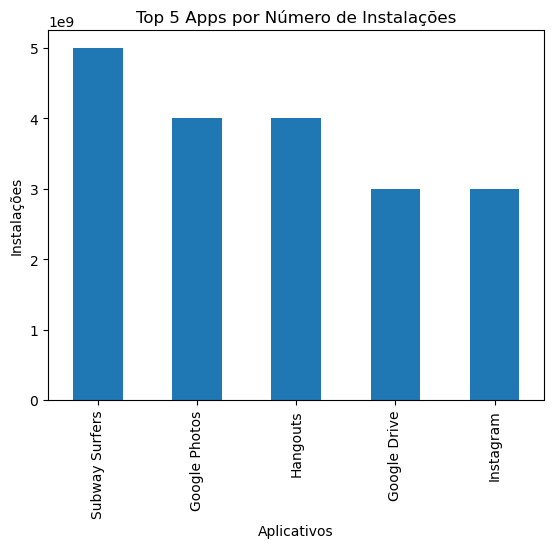

In [6]:
dataset1 = dataset.copy()
dataset1['Installs_Value'] = dataset['Installs'].str.replace(r',', '', regex=False)
dataset1['Installs_Value'] = dataset1['Installs_Value'].str.extract(r'(\d+\.?\d*)')
dataset1['Installs_Value'] = dataset1['Installs_Value'].astype(float)
dataset1['Installs_Value'] = dataset1['Installs_Value'].fillna(0)
filter1 = dataset1[['App', 'Installs_Value']].groupby(['App']).sum().sort_values('Installs_Value', ascending=False).head()

filter1.plot(kind='bar', legend=False)
plt.title('Top 5 Apps por Número de Instalações')
plt.ylabel('Instalações')
plt.xlabel('Aplicativos')
plt.show()

## Exercicio 3

In [ ]:
filter2 = dataset[['App', 'Category']].groupby(['Category']).count()

filter2 = filter2.rename(columns={'App': 'Total_Apps'})

plt.figure(figsize=(8, 8))
plt.pie(filter2['Total_Apps'], labels=filter2.index, autopct='%1.1f%%')
plt.title('Distribuição de Apps por Categoria')
plt.axis('equal')
plt.tight_layout()
plt.show()


## Exercicio 4

In [ ]:
dataset1['Price_Value'] = dataset['Price'].str.extract(r'\$(\d+\.?\d*)')
dataset1['Price_Value'] = dataset1['Price_Value'].astype(float)
dataset1[['App', 'Price_Value']].sort_values('Price_Value', ascending=False).head(1)

## Exercicio 5

In [ ]:
dataset[['App', 'Content Rating']].loc[dataset['Content Rating'] == 'Mature 17+'].groupby(['Content Rating']).count()

## Exercicio 6

In [ ]:
dataset1['Review_Value'] = dataset['Reviews'].str.extract(r'(\d+\.?\d*)')
dataset1['Review_Value'] = dataset1['Review_Value'].astype(float)
dataset1[['App', 'Review_Value']].groupby(['App']).sum().sort_values('Review_Value', ascending=False).head(10)

## Exercicio 7

In [ ]:
lista1 = dataset1[['Review_Value','Category']].groupby(['Category']).sum().sort_values('Review_Value', ascending=False).head().reset_index().to_dict(orient='records')
lista1

In [ ]:
filter7 = dataset1[['Category', 'Installs_Value']].groupby(['Category']).sum().sort_values('Installs_Value', ascending=False).head().reset_index().to_dict(orient='records')
i = 1
print('Catogorias com mais instalações')
for linha in filter7:
    print(f'{i} - Categoria {linha['Category']} com {linha['Installs_Value']} instalações')
    i += 1

## Exercicio 8

In [ ]:
filter8 = dataset1[['Category', 'Review_Value']].groupby(['Category']).sum().sort_values('Review_Value', ascending=False).head()
filter8.plot(kind='bar', legend=False)
plt.title('Top 5 categorias por número de review')
plt.ylabel('Reviwes')
plt.xlabel('Categorias')
plt.show()

In [ ]:
filter7 = dataset1[['Category', 'Installs_Value']].groupby(['Category']).sum().sort_values('Installs_Value', ascending=False).head()
filter7.plot(kind='bar', legend=False)
plt.title('Top 5 categorias por número de instalação')
plt.ylabel('Instalações')
plt.xlabel('Categorias')
plt.show()
